In [12]:
import numpy as np

import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

from aiida import load_profile
from aiida.orm import load_node
from aiida_vasp.utils.workchains import fetch_k_grid

load_profile('lauerm-prod')

Profile<uuid='536f368c4cf446c2b85092b2771de9d2' name='lauerm-prod'>

# Playing around

In [3]:
lattice = 3.189 * np.array(
    [[1/2, -np.sqrt(3)/2, 0],
     [1/2,  np.sqrt(3)/2, 0],
     [  0,             0, 5.185/3.189]]
)

origin = [0,0,0]

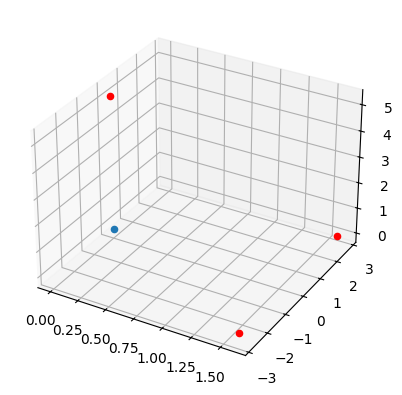

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(*lattice[0], color='red')
ax.scatter3D(*lattice[1], color='red')
ax.scatter3D(*lattice[2], color='red')
ax.scatter3D(*origin)


In [5]:
# calculate recipriocal lattice

inv_lat = 2 * np.pi * np.linalg.inv(lattice.T)
inv_lat

array([[ 1.97026821, -1.13753488, -0.        ],
       [ 1.97026821,  1.13753488,  0.        ],
       [ 0.        ,  0.        ,  1.21180044]])

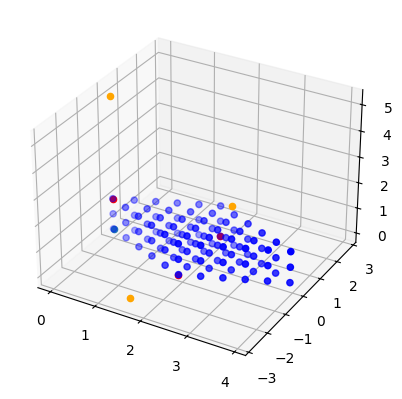

In [6]:
fig = plt.figure()
# ax = fig.add_subplot()
ax = fig.add_subplot(111, projection='3d')

n = [5, 5, 2]
kpts = np.zeros(((n[0]+1)*(n[1]+1)*(n[2]+1), 3))
idx = 0
for n1 in range(0,n[0]+1):
    for n2 in range(0,n[1]+1):
        for n3 in range(0,n[2]+1):
            k_pt = n1 / n[0] * inv_lat[0] + n2 / n[1] * inv_lat[1] + n3 / n[2] * inv_lat[2]
            kpts[idx, :] = k_pt 
            idx += 1


ax.scatter3D(*inv_lat[0], color='red')
ax.scatter3D(*inv_lat[1], color='red')
ax.scatter3D(*inv_lat[2], color='red')
ax.scatter3D(*origin)

ax.scatter3D(*lattice[0], color='orange')
ax.scatter3D(*lattice[1], color='orange')
ax.scatter3D(*lattice[2], color='orange')

ax.scatter3D(kpts[:,0], kpts[:,1], kpts[:,2], color='blue')

In [7]:
# what do k_sample, k_samples, k_dense and k_coarse?
N_a = 22
N_c = 18

k_spacing_a = np.linalg.norm(inv_lat[0])/N_a
k_spacing_c = np.linalg.norm(inv_lat[2])/N_c

k_spacing_a, k_spacing_c
# lets jsut go with 0.35 - 0.1 that should be good for now - and 

(0.10341226170838497, 0.06732224694288638)

In [10]:
spacings= np.linspace(0.07, 0.35, 15)

for spacing in spacings:
    print(np.round(np.linalg.norm(inv_lat[0]) / spacing), np.round(np.linalg.norm(inv_lat[2]) / spacing))

33.0 17.0
25.0 13.0
21.0 11.0
18.0 9.0
15.0 8.0
13.0 7.0
12.0 6.0
11.0 6.0
10.0 5.0
9.0 5.0
8.0 4.0
8.0 4.0
7.0 4.0
7.0 4.0
7.0 3.0


In [9]:
for a in range(10):
    print(300 + a * 25)

300
325
350
375
400
425
450
475
500
525


# Checking

In [2]:
STRUCTURE_PKs = [
    691, # wz-AlN
    688, # wz-ScN
    689, # wz-GaN
    690, # wz-InN
]

In [27]:
k_dense = 0.07
k_coarse = 0.35
k_samples = 14

stepping = (
                k_coarse - k_dense
            ) / k_samples

k_sampling = [
                k_coarse - x * stepping
                for x in range(k_samples + 1)
            ]

print([300 + 25*idx for idx in range(15)])

kgrids = []
for STRUCTURE_PK in STRUCTURE_PKs:
    structure = load_node(STRUCTURE_PK).get_pymatgen()
    lattice = structure.lattice
    lat_arr = lattice.matrix
    inv_lat = 2 * np.pi * np.linalg.inv(lat_arr.T)

    # print(STRUCTURE_PK)
    # print(f"Lattice\n\t{lat_arr}\n\n")
    # print(f"Inverse Lattice\n\t{inv_lat}\n\n")

    old_kgrid = [0, 0, 0]
    kgrids.append([])
    # print(f"k-Grid")
    for kstep in k_sampling:
        kgrid = fetch_k_grid(inv_lat, kstep)
        if kgrid == old_kgrid:
            kgrid = [k+1 for k in kgrid]
        
        old_kgrid = kgrid
        kgrids[-1].append(kgrid)
        # print(f"\t{kgrid}")

kgrids[2]

[300, 325, 350, 375, 400, 425, 450, 475, 500, 525, 550, 575, 600, 625, 650]


[[7, 7, 4],
 [8, 8, 5],
 [8, 8, 4],
 [8, 8, 5],
 [9, 9, 5],
 [10, 10, 5],
 [10, 10, 6],
 [11, 11, 6],
 [12, 12, 7],
 [14, 14, 8],
 [16, 16, 9],
 [18, 18, 10],
 [21, 21, 12],
 [26, 26, 14],
 [33, 33, 18]]

In [65]:
# important - checks if the grid already exist, and if it does adds +1 to all kpoints
s = 14
stepping = (
                0.35 - 0.07
            ) / s

k_sampling = [
                0.35 - x * stepping
                for x in range(s + 1)
            ]

In [ ]:

old_kgrid = [0, 0, 0]
for k_step in k_sampling:
    kgrid = fetch_k_grid(inv_lat, k_step)
    if kgrid == old_kgrid:
        kgrid = [el + 1 for el in kgrid]
        print(kgrid, 1)
    else:
        old_kgrid = kgrid
        print(kgrid)

[7, 7, 4]
[8, 8, 5] 1
[8, 8, 4]
[8, 8, 5]
[9, 9, 5]
[10, 10, 5]
[10, 10, 6]
[11, 11, 6]
[12, 12, 7]
[14, 14, 8]
[16, 16, 9]
[18, 18, 10]
[21, 21, 12]
[26, 26, 14]
[33, 33, 18]
